# Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.linear_model import LinearRegression

from data import get_data

# Data preprocessing

## Load data

In [2]:
# df = get_data()
# df.to_pickle("data/data_df.pkl")
df = pd.read_pickle("data/data_df.pkl")

n = df.shape[0]

## Synchronize biosignal data

In [3]:
measurements = ["BVP", "EDA", "HR", "TEMP"]

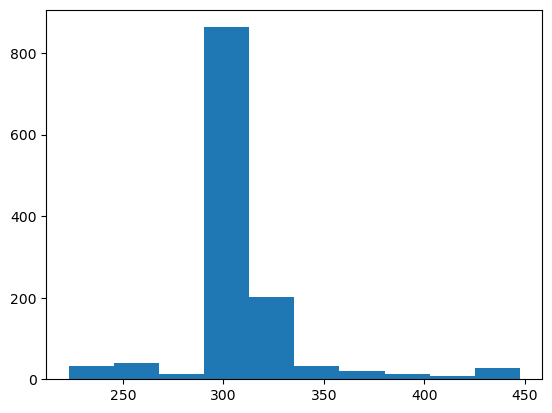

In [4]:
times = []
lengths = []
m_df_sync = {m: list() for m in measurements}
for row in range(n):
    phase = int(df.loc[row, 'phase'][-1])
    for m in measurements:
        m_df = df.loc[row, m]
        # print(m_df['time_seconds'].max())
        times.append(m_df['time_seconds'].max())

plt.hist(times);

In [12]:
freqs = {"BVP": 64, "TEMP": 4, "EDA": 4, "HR": 1}

lengths = []
m_df_sync = {m: list() for m in measurements}
for row in range(df.shape[0]):
    time = np.arange(0, 300, 1 / 64)
    fail = False  # Flag for failure upon too little data
    for m in measurements:
        m_df = df.loc[row, m]
        series = m_df[m].to_numpy()
        if freqs[m] != 64:
            target_len = int(64 / freqs[m] * len(series))
            series = signal.resample(series, target_len)

        series = series[:time.size]  # Cut off tailing data
        
        if len(series) != time.size:
            diff = time.size - len(series)
            series = np.concatenate((series, np.repeat(series.mean, diff)))
        m_df_sync[m].append(series)
for m, synched in m_df_sync.items():
    df[f'{m}_synched'] = synched

In [13]:
df.head()

,BVP,EDA,HR,TEMP,response,round,phase,participant,BVP_slope,BVP_intercept,EDA_slope,EDA_intercept,HR_slope,HR_intercept,TEMP_slope,TEMP_intercept,BVP_synched,EDA_synched,HR_synched,TEMP_synched
0,BVP time time_...,EDA time time_s...,HR time time_seconds 0...,TEMP time time_seco...,particpant_ID puzzler team_ID E4_nr up...,round_1,phase1,"(D1_1, ID_1)",0.001264,-0.408534,0.000275,0.185878,0.003339,77.745930,0.000225,31.247527,"[-61.33, -56.25, -47.83, -35.69, -20.53, -4.1,...","[0.18582699999999977, 0.1829076670776679, 0.18...","[76.75, 76.727209151694, 76.70528827982247, 76...","[30.970000000000002, 30.94919405798327, 30.931..."
1,BVP time time...,EDA time time_s...,HR time time_seconds 0...,TEMP time time_seco...,particpant_ID puzzler team_ID E4_nr up...,round_1,phase2,"(D1_1, ID_1)",0.002684,-0.433311,0.000066,0.389471,0.002979,84.673214,0.001565,32.350712,"[-3.4, -12.83, -15.64, -14.6, -13.47, -15.57, ...","[0.37293500000000007, 0.3721420514550866, 0.37...","[99.05000000000001, 99.13276287762805, 99.2123...","[32.25, 32.22400479580902, 32.20217554746913, ..."
2,BVP time time_...,EDA time time_s...,HR time time_seconds 0...,TEMP time time_seco...,particpant_ID puzzler team_ID E4_nr up...,round_1,phase3,"(D1_1, ID_1)",-0.000756,0.254186,-0.000073,0.295791,-0.006082,87.041897,0.000833,32.768604,"[-9.1, 6.31, 16.96, 24.92, 33.21, 44.33, 59.3,...","[0.4395760000000001, 0.4465668533347507, 0.452...","[84.41999999999997, 84.39629188721365, 84.3734...","[32.97000000000001, 32.96410203604903, 32.9590..."
3,BVP time time...,EDA time time_s...,HR time time_seconds 0...,TEMP time time_seco...,particpant_ID puzzler team_ID E4_nr up...,round_2,phase1,"(D1_1, ID_1)",-0.000659,0.066318,-0.000100,0.506500,-0.003443,85.981583,0.001018,33.403930,"[-110.39, -93.89, -78.44, -66.28, -57.98, -52....","[0.4946829999999997, 0.49578687423329, 0.49674...","[76.33000000000006, 76.2876193259277, 76.24702...","[33.37, 33.358575048481086, 33.3490854286391, ..."
4,BVP time time_...,EDA time time_s...,HR time time_seconds 0...,TEMP time time_seco...,particpant_ID puzzler team_ID E4_nr up...,round_2,phase2,"(D1_1, ID_1)",-0.002296,0.395254,-0.000134,0.376909,-0.005166,85.102968,0.001168,33.711108,"[38.31, 44.5, 50.35, 55.65, 60.11, 63.63, 66.4...","[0.3911439999999993, 0.39106217928641135, 0.39...","[83.53000000000003, 83.51060349067826, 83.4920...","[33.709999999999965, 33.6961202327857, 33.6845..."


## Fit linear model to biosignals

In [6]:
measurements = ["BVP", "EDA", "HR", "TEMP"]

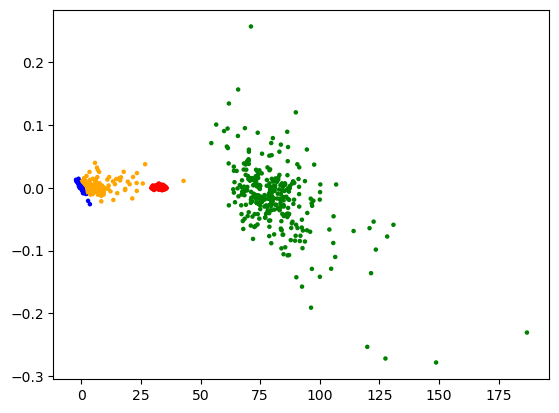

In [7]:
slopes, intercepts, labels = [], [], []
for row in range(df.shape[0]):
    for m in measurements:
        m_df = df.loc[row, m]
        X = m_df['time_seconds'].to_numpy()
        y = m_df[m]
        reg = LinearRegression().fit(X.reshape(-1, 1), y)
        slope = reg.coef_[0]
        intercept = reg.intercept_
        intercepts.append(intercept)
        slopes.append(slope)
        labels.append(m)
slopes = np.array(slopes)
intercepts = np.array(intercepts)
labels = np.array(labels)
for m in measurements:
    mask = labels == m
    df[f'{m}_slope'] = slopes[mask]
    df[f'{m}_intercept'] = intercepts[mask]
colors = ['blue', 'orange', 'green', 'red']
m_to_c = {m: c for m, c in zip(measurements, colors)}
plt.scatter(intercepts,
            slopes,
            c=list(map(lambda m: m_to_c[m], labels)),
            s=5,
            label=labels)

In [8]:
# for p in data:
#     for m in data[p]:
#         if m in measurements:
#             for rp in data[p][m]:
#                 m_df = data[p][m][rp]
#                 X = m_df['time_seconds'].to_numpy()
#                 y = m_df[m]
#                 reg = LinearRegression().fit(X.reshape(-1, 1), y)
#                 slope = reg.coef_[0]
#                 intercept = reg.intercept_
#                 print(p, m, rp)
#                 print(slope)